In [1]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patheffects as pe
from matplotlib.ticker import MaxNLocator

In [2]:
case_path = os.path.join(os.path.dirname(os.getcwd()), "data", "gantt.csv")
# case_path = os.path.join(os.path.dirname(os.getcwd()), "data", "gantt_main.csv")
# case_path = os.path.join(os.path.dirname(os.getcwd()), "data", "gantt_main_week.csv") # whole week

In [3]:
df = pd.read_csv(case_path)
df=df.assign(CaseID=range(len(df)))
df['Scheduled Setup Start']=pd.to_datetime(df['Scheduled Setup Start'])
df['Scheduled Cleanup Complete']=pd.to_datetime(df['Scheduled Cleanup Complete'])
df['Scheduled Room Duration']=(df['Scheduled Cleanup Complete']-df['Scheduled Setup Start']).astype('timedelta64[m]')
df["Case Expected Date"].fillna(method='ffill', inplace = True)
df['Room']=df.apply(lambda row: int(re.search(r'\d+', row['Room']).group()), axis = 1)
df = df.loc[df['Room']<41]
df = df.dropna()
df['Day']=df.groupby('Date').ngroup()
df['Room']=df['Room']+df['Day']*40
df['SurgeonID'] = df.groupby('Primary Surgeon Name').ngroup()

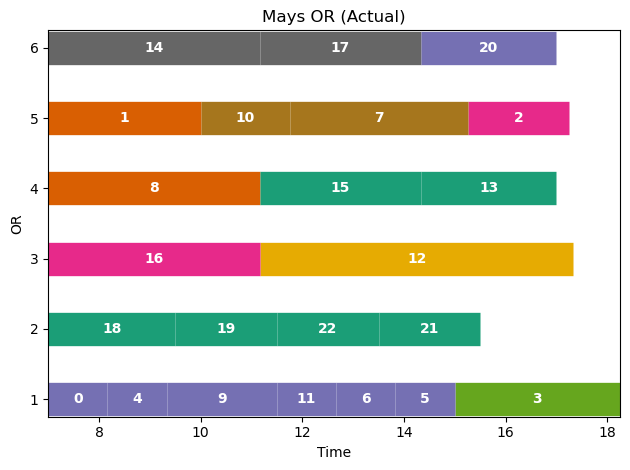

In [10]:
sessions = sorted(list(df['Room'].unique()))

# bar_style = {'alpha': 1.0, 'lw': 1, 'solid_capstyle': 'butt'} # 200
# text_style = {'color': 'white', 'ha': 'center', 'va': 'center'}
bar_style = {'alpha': 1.0, 'lw': 24, 'solid_capstyle': 'butt'} # 40 ors
text_style = {'color': 'white', 'weight': 'bold', 'ha': 'center', 'va': 'center'}

colors = cm.Dark2.colors

fig, ax = plt.subplots(1, 1)

# for s_ix, s in df.iterrows():
#     xs = s['Scheduled Setup Start'].hour + s['Scheduled Setup Start'].minute/60
#     xf = s['Scheduled Cleanup Complete'].hour + s['Scheduled Cleanup Complete'].minute/60
#     ax.plot([xs, xf], [s['Room']] * 2, c=colors[s['SurgeonID']%len(colors)], **bar_style)
#     ax.text((xs + xf) / 2, s['Room'], s['Primary Surgeon Name'][:2], **text_style)

for s_ix, s in df.iterrows():
    xs = s['Scheduled Setup Start'].hour + s['Scheduled Setup Start'].minute/60
    xf = s['Scheduled Cleanup Complete'].hour + s['Scheduled Cleanup Complete'].minute/60
    ax.plot([xs, xf], [s['Room']] * 2, c=colors[s['SurgeonID']%len(colors)], **bar_style)
    ax.text((xs + xf) / 2, s['Room'], s['CaseID'], **text_style)

# ax.set_title('OR Schedule for Monday')
# ax.set_title('OR Schedule for the week')
ax.set_title('Mays OR (Actual)')
ax.set_xlabel('Time')

ax.set_ylabel('OR')
# ax.grid(True)
ax.set_xlim([7, 18.25])
# ax.set_ylim([0, 7])
# ax.set_xlim([7, 24])
# ax.set_ylim([0, 40])
# ax.set_xlim([7, 24])
# ax.set_ylim([0, 200])

ax.yaxis.set_major_locator(MaxNLocator(integer=True))

fig.tight_layout()
plt.show()

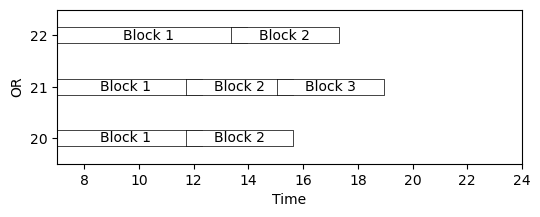

In [86]:
text_style = {'color': 'black', 'ha': 'center', 'va': 'center'}
# bar_style = {'alpha': 1.0, 'lw': 6, 'solid_capstyle': 'butt'} # 40 ors
# text_style = {'color': 'white', 'weight': 'bold', 'ha': 'center', 'va': 'center'}
colors = cm.Dark2.colors

fig, ax = plt.subplots(1, 1, figsize = (6,2))

# ors = [[600, 300], [200, 300, 300], [400, 300]]
ors = [[300, 200], [300, 200, 200], [400, 200]]

linwid = 0.8
y_pos=[]
for i in range(len(ors)):
    for j in range(len(ors[i])):
        xs = (sum(ors[i][:j])+420)/60
        xf = (sum(ors[i][:j+1])+420)/60
        y_p=i/5
        
        ax.plot([xs, xf], [y_p]*2, c='k', lw=12)
        ax.plot([xs, xf], [y_p]*2, c='w', lw=11)
        ax.text((xs + xf) / 2, y_p, 'Block '+str(j+1), **text_style)
    y_pos.append(y_p)
ax.set_xlabel('Time')
ax.set_ylabel('OR')
ax.set_xlim([7, 24])
ax.set_ylim([-0.1, .5])

# ax.yaxis.set_major_locator(MaxNLocator(integer=True))
# people = ['32', '35', '36']
people = ['20', '21', '22']
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
# fig.tight_layout()
plt.show()

In [77]:
y_pos

[0.0, 0.2, 0.4]